In [155]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

In [156]:
df = pd.read_csv('train.csv')
X = df.iloc[:, 1:12]
y = df.iloc[:, 12]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [157]:
# Checking for Null Values
df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [158]:
# Checking class balance
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Missing Values Treatment

In [159]:
#Data Cleaning
# Imputed missing values with their respective mode values
df['Gender'] = X['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+')
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(np.int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(np.int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
df['Dependents'] = df['Dependents'].astype(np.int)

In [160]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [161]:
df.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

# Exploratory Data Analysis

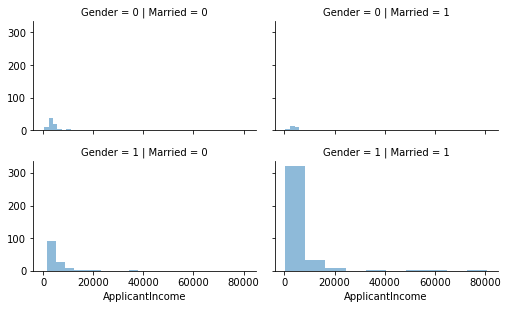

In [162]:
grid = sns.FacetGrid(df, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

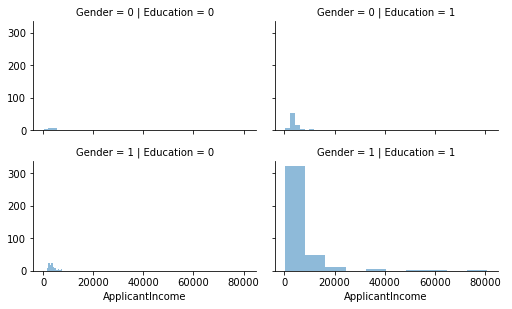

In [163]:
grid = sns.FacetGrid(df, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

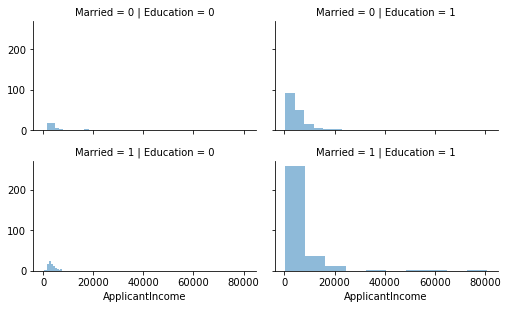

In [164]:
grid = sns.FacetGrid(df, row='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

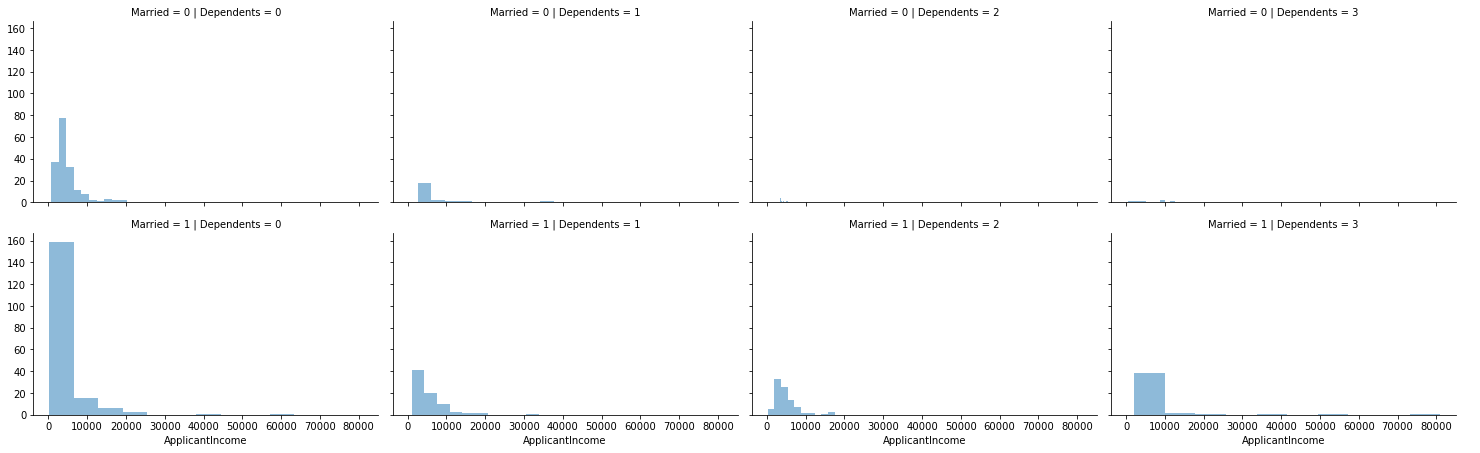

In [165]:
grid = sns.FacetGrid(df, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

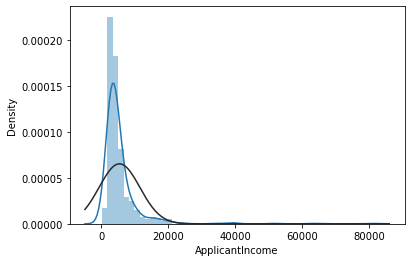

<Figure size 432x288 with 0 Axes>

In [166]:
#histogram and normal probability plot
sns.distplot(df['ApplicantIncome'], fit=norm);
fig = plt.figure()

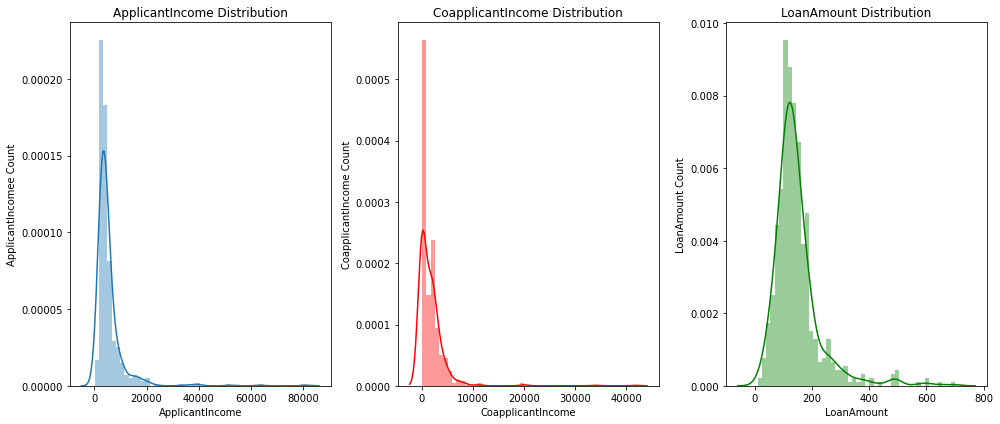

<Figure size 432x288 with 0 Axes>

In [167]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.distplot(df['ApplicantIncome'], ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncomee Count')

sns.distplot(df['CoapplicantIncome'], color = "r", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.distplot(df['LoanAmount'],color = "g", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

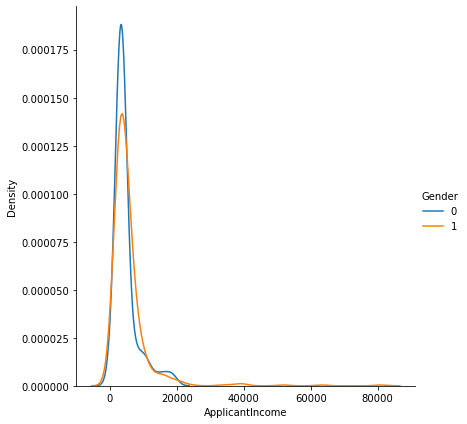

In [168]:
sns.FacetGrid(df, hue="Gender", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

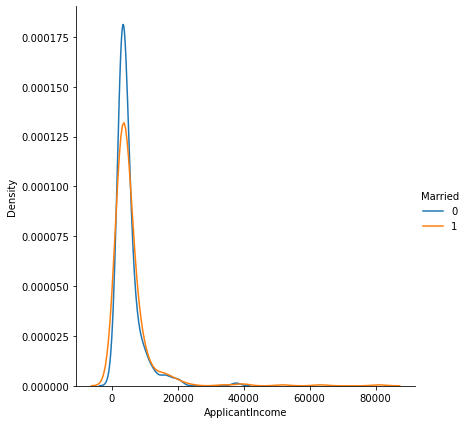

In [169]:
sns.FacetGrid(df, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

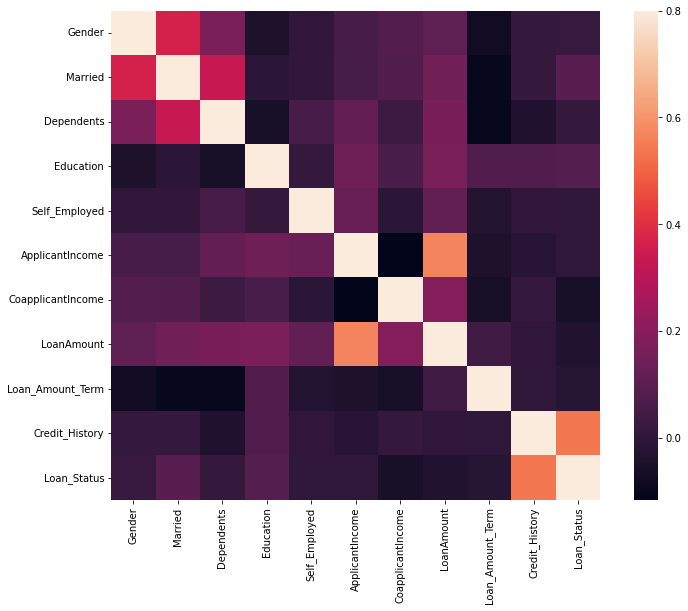

In [170]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

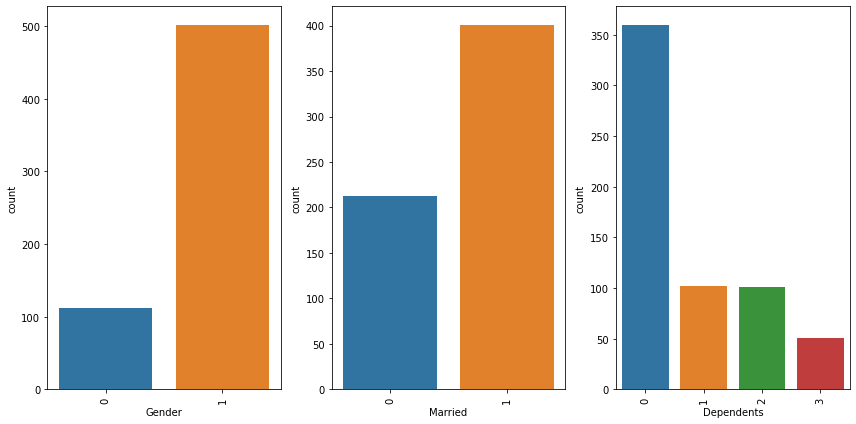

<Figure size 432x288 with 0 Axes>

In [171]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Dependents"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

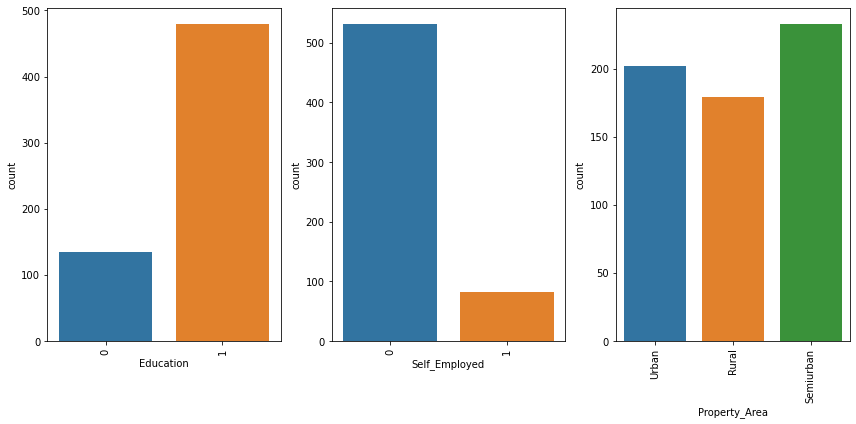

<Figure size 432x288 with 0 Axes>

In [172]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df["Education"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Self_Employed"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df["Property_Area"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

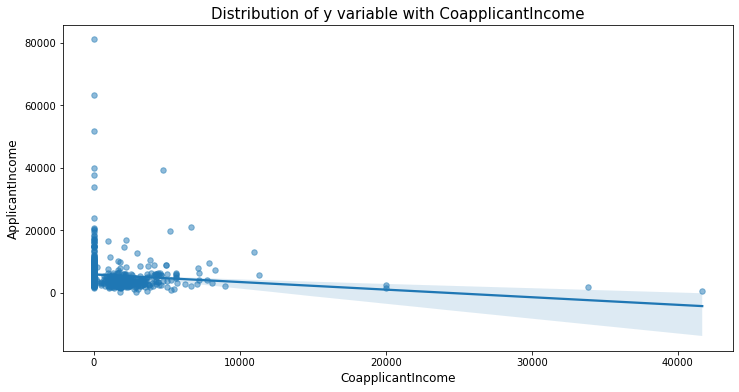

In [173]:
var_name = "CoapplicantIncome"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

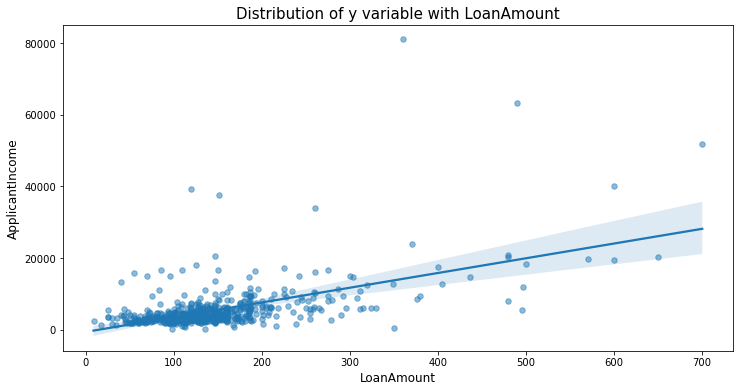

In [174]:
var_name = "LoanAmount"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

# Modelling

In [175]:
X = df.iloc[:, 1:12]
y = df.iloc[:, 12]

In [176]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = sc.fit_transform(X[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [183]:
# Categorical data Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X.iloc[:,10:11] = enc.fit_transform(X.iloc[:,10:11])
print(X.shape)

(614, 11)


In [184]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,0.000000,360.0,1.0,2.0
1,1,1,1,1,0,-0.134412,-0.038732,-0.219273,360.0,1.0,0.0
2,1,1,0,1,1,-0.393747,-0.554487,-0.957641,360.0,1.0,2.0
3,1,1,0,0,0,-0.462062,0.251980,-0.314547,360.0,1.0,2.0
4,1,0,0,1,0,0.097728,-0.554487,-0.064454,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.410130,-0.554487,-0.898095,360.0,1.0,0.0
610,1,1,3,1,0,-0.212557,-0.554487,-1.267279,180.0,1.0,0.0
611,1,1,1,1,0,0.437174,-0.472404,1.269371,360.0,1.0,2.0
612,1,1,2,1,0,0.357064,-0.554487,0.483367,360.0,1.0,2.0


In [185]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22,shuffle = True)

In [186]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
306,0,0,0,1,0,-0.268912,0.015307,-0.135909,360.0,1.0,0.0
122,0,0,0,1,0,-0.535129,2.516790,-0.112091,360.0,0.0,1.0
548,0,0,0,1,0,-0.066097,-0.554487,-0.517002,360.0,0.0,1.0
385,1,0,1,1,0,-0.284476,-0.554487,-0.397911,180.0,1.0,2.0
523,1,1,2,1,1,0.416860,1.896379,3.972750,360.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
491,1,1,1,0,0,-0.011543,-0.167670,0.471458,360.0,1.0,2.0
502,1,1,2,1,0,-0.088213,1.368994,0.733459,360.0,1.0,1.0
358,1,1,0,0,0,-0.393747,0.015307,-0.552730,480.0,0.0,2.0
356,1,1,2,1,0,0.479933,0.528668,0.221365,360.0,1.0,0.0


# Decision Tree

              precision    recall  f1-score   support

           0       0.77      0.51      0.62        39
           1       0.80      0.93      0.86        84

    accuracy                           0.80       123
   macro avg       0.79      0.72      0.74       123
weighted avg       0.79      0.80      0.78       123



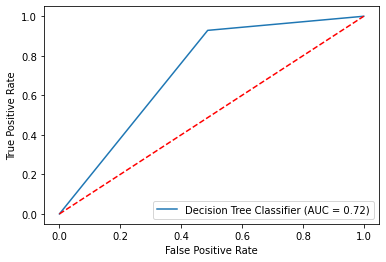

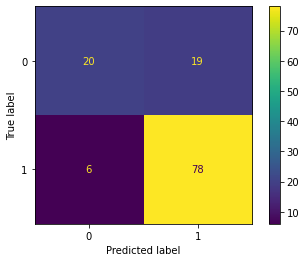

In [193]:
dtclf = DecisionTreeClassifier(max_depth=4,min_samples_split=5,criterion="entropy",random_state=42)
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

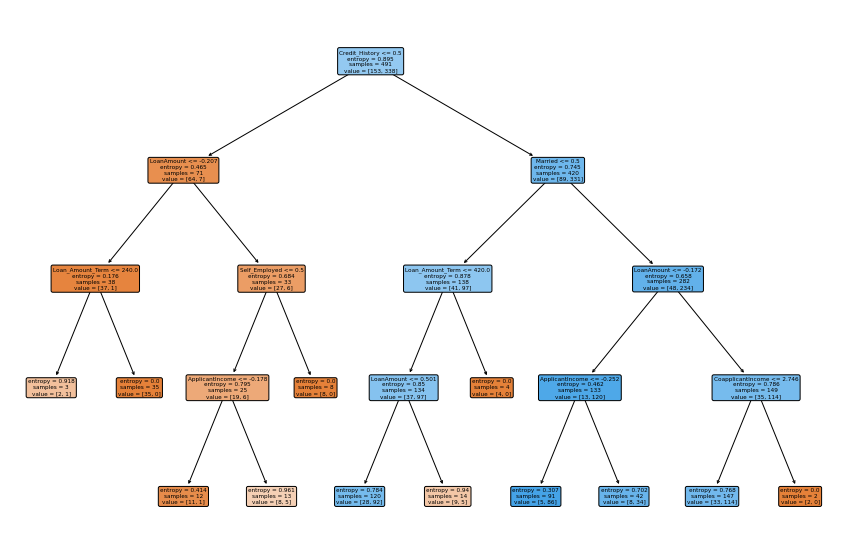

In [210]:
# fig = plt.figure(figsize=(15,10))
# _ = tree.plot_tree(dtclf,
#                    feature_names=X.columns,
#                    filled=True)
plt.figure(figsize=(15, 10))
tree.plot_tree(dtclf, filled=True, rounded=True, 
           feature_names=X.columns);
fig.savefig('DT.png')

# Support Vector Machines

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123



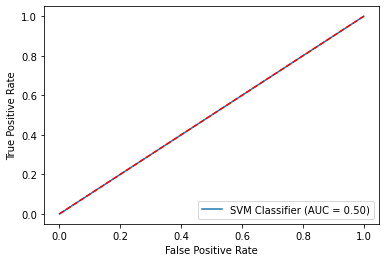

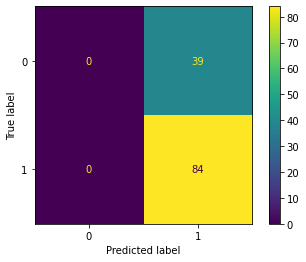

In [196]:
svcclf = LinearSVC(random_state = 12)
svcclf = svcclf.fit(X_train,y_train)
y_pred = svcclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVM Classifier')
display.plot() 
plt.plot([0, 1], [0, 1],'r--')# doctest: +SKIP
plt.show()  
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

# Logistic Regression

              precision    recall  f1-score   support

           0       0.95      0.46      0.62        39
           1       0.80      0.99      0.88        84

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.85      0.82      0.80       123



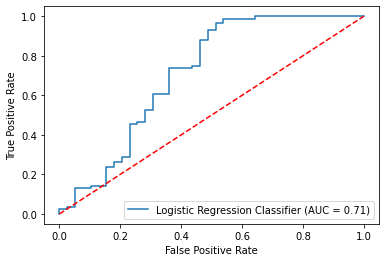

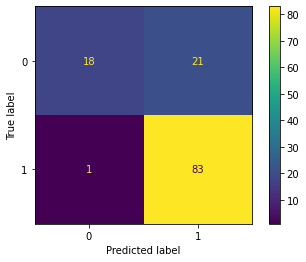

In [197]:
lgclf = LogisticRegression(random_state = 12)
lgcclf = lgclf.fit(X_train,y_train)
y_pred_proba = lgclf.predict_proba(X_test)
y_pred = lgclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1],drop_intermediate=True)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

# Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        39
           1       0.79      0.96      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



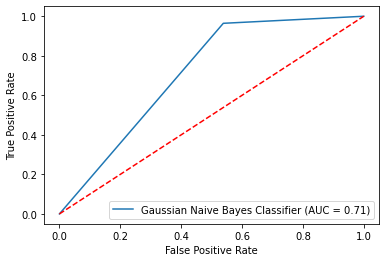

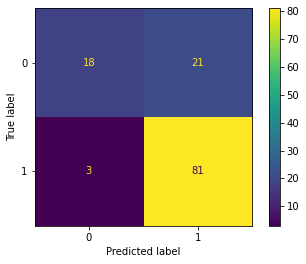

In [198]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb=gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Gaussian Naive Bayes Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

# Artificial Neural Network

In [199]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [200]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [203]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
50/50 [==============================] - 1s 3ms/step - loss: 0.5450 - accuracy: 0.7678
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7271
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7536
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7760
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5450 - accuracy: 0.7658
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5510 - accuracy: 0.7597
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7047
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5448 - accuracy: 0.7230
Epoch 9/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.7475
Epoch 10/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5558 - accuracy: 0.7556
Epoch 11/50
50/50 [

In [204]:
y_pred_prob = ann.predict(X_test)


4/4 [==============================] - 0s 7ms/step


In [206]:
y_pred_prob.mean()

0.7034219

              precision    recall  f1-score   support

           0       0.61      0.56      0.59        39
           1       0.80      0.83      0.82        84

    accuracy                           0.75       123
   macro avg       0.71      0.70      0.70       123
weighted avg       0.74      0.75      0.75       123



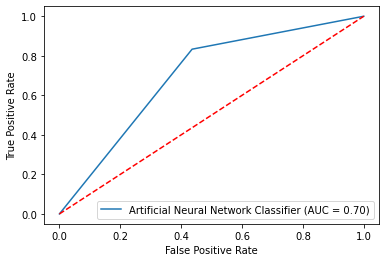

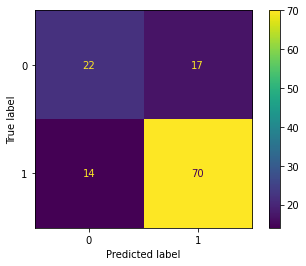

In [207]:
y_pred = (y_pred_prob > 0.7)
#Confusion Matrix
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Artificial Neural Network Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

# Ensemble Modelling

In [211]:
pip install xgboost

# XGboost Classifier

In [212]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

xgbc = XGBClassifier()

In [213]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [214]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.77


In [215]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )

In [216]:
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.76


In [217]:
ypred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,ypred)
print(cm)

[[22 17]
 [16 68]]


              precision    recall  f1-score   support

           0       0.58      0.56      0.57        39
           1       0.80      0.81      0.80        84

    accuracy                           0.73       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.73      0.73      0.73       123



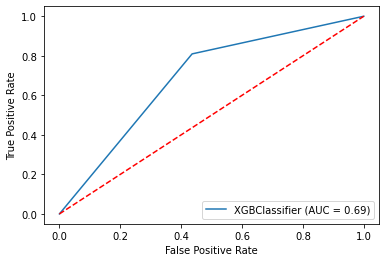

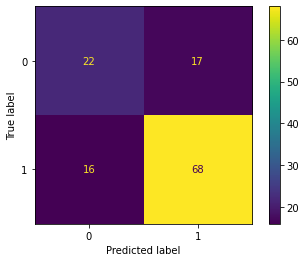

In [218]:
print(classification_report(y_test, ypred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,ypred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBClassifier')
display.plot()  
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, ypred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

# Bagging Classifier

In [220]:
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(base_estimator=dtclf, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)
ytest_pred=bag_model.predict(X_test)
print(bag_model.score(X_test, y_test))
print(confusion_matrix(y_test, ytest_pred)) 


0.8130081300813008
[[17 22]
 [ 1 83]]


              precision    recall  f1-score   support

           0       0.94      0.44      0.60        39
           1       0.79      0.99      0.88        84

    accuracy                           0.81       123
   macro avg       0.87      0.71      0.74       123
weighted avg       0.84      0.81      0.79       123



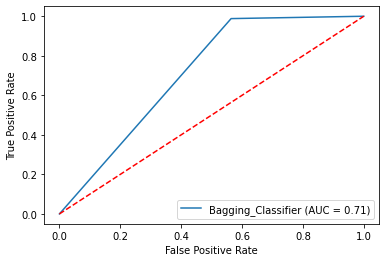

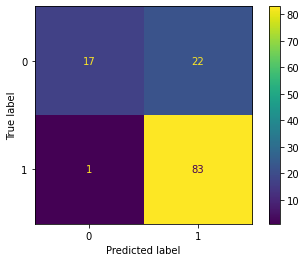

In [221]:
print(classification_report(y_test, ytest_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Bagging_Classifier')
display.plot()  
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, ytest_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

# RandomForestClassifier

In [222]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred_randomforest=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_randomforest))

Accuracy: 0.7642276422764228


              precision    recall  f1-score   support

           0       0.66      0.54      0.59        39
           1       0.80      0.87      0.83        84

    accuracy                           0.76       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.76      0.76      0.76       123



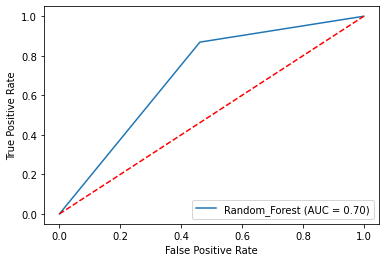

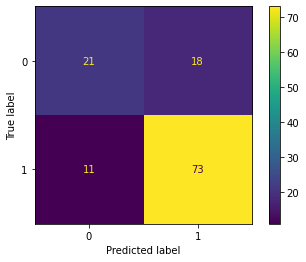

In [223]:
print(classification_report(y_test, y_pred_randomforest))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_randomforest,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random_Forest')
display.plot()  
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred_randomforest)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

# Gradient Boosting Classifier 

In [224]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_grad_boost=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grad_boost))

Accuracy: 0.7886178861788617


              precision    recall  f1-score   support

           0       0.76      0.49      0.59        39
           1       0.80      0.93      0.86        84

    accuracy                           0.79       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.78      0.79      0.77       123



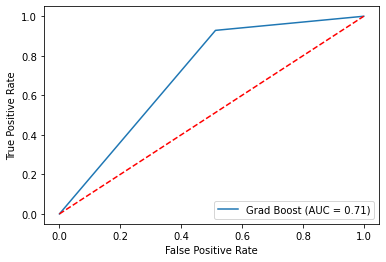

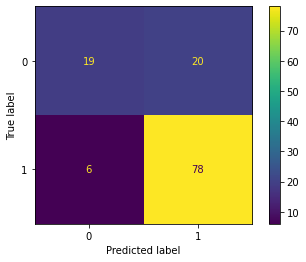

In [225]:
print(classification_report(y_test, y_pred_grad_boost))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_grad_boost,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Grad Boost')
display.plot()  
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred_grad_boost)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

# Summary

In [228]:
print('AUC of Logistic regression classifier : {:.2f}'
     .format(0.71))
print('AUC of Decision Tree classifier : {:.2f}'
     .format(0.72))
print('AUC of GNB classifier : {:.2f}'
     .format(0.71))
print('AUC of SVM classifier : {:.2f}'
     .format(0.50))
print('AUC of ANN classifier : {:.2f}'
     .format(0.70))
print('AUC of XGBoost classifier : {:.2f}'
     .format(0.69))
print('AUC of Bagging classifier : {:.2f}'
     .format(0.71))
print('AUC of Random Forest classifier : {:.2f}'
     .format(0.70))
print('AUC of Gradient Boosting classifier : {:.2f}'
     .format(0.71))

AUC of Logistic regression classifier : 0.71
AUC of Decision Tree classifier : 0.72
AUC of GNB classifier : 0.71
AUC of SVM classifier : 0.50
AUC of ANN classifier : 0.70
AUC of XGBoost classifier : 0.69
AUC of Bagging classifier : 0.71
AUC of Random Forest classifier : 0.70
AUC of Gradient Boosting classifier : 0.71
